# **Prediksi Harga - Simple Linear Regression**

## 1. Data Preparation

### 1.1 Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1.2 Baca Dataset

In [2]:
df = pd.read_excel("Datains - Marcella - Price Monitoring TP-Link_TP-Link Price Monitoring_Table (1).xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32772 entries, 0 to 32771
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            32772 non-null  datetime64[ns]
 1   Last Crawling   32772 non-null  datetime64[ns]
 2   SKU Name        32772 non-null  object        
 3   Product Name    32772 non-null  object        
 4   Url Product     32772 non-null  object        
 5   Seller          32772 non-null  object        
 6   Merchant        32772 non-null  object        
 7   Stock           32772 non-null  object        
 8   Item Condition  32772 non-null  object        
 9   Filter          32772 non-null  object        
 10  Flag            32772 non-null  object        
 11  Bottom Price    32772 non-null  int64         
 12  Original Price  32772 non-null  object        
 13  Discount        32772 non-null  object        
 14  Selling Price   32772 non-null  int64         
 15  Di

In [4]:
print('Baca 5 baris teratas:\n')
df.head()

Baca 5 baris teratas:



,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
0,2022-10-22,2022-10-22,TL WR840N,TP-Link TL-WR840N 2 Antenna 300Mbps Wireless N...,https://tokopedia.com/ccplace/tp-link-tl-wr840...,ccplace shop,tokopedia,In Stock,baru,Above,Please Check,155000,231000,0,231000,0.014903,0,0
1,2022-10-22,2022-10-22,TL WR840N,Promo TP-LINK TL-WR840N Wireless Router 300Mbp...,https://tokopedia.com/gilsaashopp/promo-tp-lin...,gilsaa_shopp,tokopedia,In Stock,baru,Above,Please Check,155000,218800,0,218800,0.014116,0,0
2,2022-10-22,2022-10-22,TL WR840N,Tp-Link TL-WR840N 300Mbps Wireless N Speed Rou...,https://tokopedia.com/ccwinta/tp-link-tl-wr840...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,227000,0,227000,0.014645,0,0
3,2022-10-22,2022-10-22,TL WR840N,JARINGAN TP-LINK TL-WR 840N TL-WR840N 300MBps ...,https://tokopedia.com/belsa/jaringan-tp-link-t...,BELSA_SHOP,tokopedia,In Stock,baru,Above,Please Check,155000,263000,0,263000,0.016968,0,0
4,2022-10-22,2022-10-22,TL WR840N,TPLink TL-WR840N Router Wireless WiFi 300Mbps ...,https://tokopedia.com/ccwinta/tplink-tl-wr840n...,ccwinta shop,tokopedia,In Stock,baru,Above,Please Check,155000,236000,0,236000,0.015226,0,0


In [5]:
df['Sales Quantity'].unique()

array([    0,     8,     5,    59,  2513,     3,    30,     1,    18,
           4, 13386,   190,     2,   102,  1468,    13,     6,    11,
         546,   552,   297,    78,   711,   139,   161,  1678,    54,
        3579,     9,     7,    82,   199, 15433,    95,    60,   121,
          77,    40,   847,   867,   184,   170,  7354,  1951,   211,
          22,   123,  3679,    52,    98,    21,    19,   149,   767,
          41,    38,    16,    15,    27,    17,    20,    12,   179,
          76,    74,    72,  1510,    25,    23,  1025,  1757,    10,
         285,    43,    67,   301,   183,  8975,   163,  1087,  3011,
        1409,    28,   494,  1471,   476,  9146,   253,    24,    69,
         245,    39,   586,    84,   132,  7155,   229,   417,  1733,
         816,    90,    14,   134,  1099,    26,   617,   225,   130,
          36,   530,   105,   182, 12921,    88,  4153,   143,   308,
         115,   185, 10891,   389,    32,    29,   479,   172,  8318,
         262,   104,

In [6]:
df.shape

(32772, 18)

In [7]:
print('Baca 5 baris terbawah:\n')
df.tail()

Baca 5 baris terbawah:



,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
32767,2022-09-20,2022-09-20,TL WR840N,KODE CVUSM02 TP-LINK TL-WR840N 300MBps Wireles...,https://tokopedia.com/cvunggulsidomukti/kode-c...,CV Unggul Sido Mukti,tokopedia,In Stock,baru,Above,Please Check,155000,244000,0,244000,0.015742,0,0
32768,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/carlton279/wireless-rout...,carlton279,tokopedia,In Stock,baru,Above,Please Check,155000,212000,0,212000,0.013677,0,0
32769,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL-WR840N 300Mbps Wireless Router / Wi...,https://tokopedia.com/forgotenstore/tp-link-tl...,Forgoten Store,tokopedia,In Stock,baru,Above,Please Check,155000,271733,0,271733,0.017531,0,0
32770,2022-09-20,2022-09-20,TL WR840N,WIRELESS ROUTER TP-LINK TL-WR840N 300Mbps,https://tokopedia.com/sani1/wireless-router-tp...,Sani1_Shop,tokopedia,In Stock,baru,Above,Please Check,155000,210000,0,210000,0.013548,0,0
32771,2022-09-20,2022-09-20,TL WR840N,Router Tp-Link Wifi Wireless 300Mbps - Tl-Wr840N,https://tokopedia.com/plum-stores/router-tp-li...,PLUM store&#39;s,tokopedia,In Stock,baru,Above,Please Check,155000,274900,0,274900,0.017735,0,0


In [8]:
print('Baca 10 data acak:\n')
df.sample(10)

Baca 10 data acak:



,Date,Last Crawling,SKU Name,Product Name,Url Product,Seller,Merchant,Stock,Item Condition,Filter,Flag,Bottom Price,Original Price,Discount,Selling Price,Discrepancy,Sales Quantity,Sales Revenue
22034,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL-WR840N 300Mbps Router N Wireless,https://tokopedia.com/zaskiamonita/tp-link-tl-...,zaskiamonita,tokopedia,In Stock,baru,Above,Please Check,155000,307000,0,307000,0.019806,0,0
24243,2022-09-20,2022-09-20,TL WR840N,WP761 TP-Link TL-WR840N 300Mbps TPLink WiFi Wi...,https://tokopedia.com/milean/wp761-tp-link-tl-...,mileanius,tokopedia,In Stock,baru,Above,Please Check,155000,249000,0,249000,0.016065,0,0
7396,2022-09-29,2022-09-29,TL WR840N,Sale TP-LINK TL-WR840N WIRELESS ROUTER TL WR84...,https://tokopedia.com/jr-st0re/sale-tp-link-tl...,JR ST0RE,tokopedia,In Stock,baru,Above,Please Check,155000,265600,0,265600,0.017135,0,0
24387,2022-09-20,2022-09-20,TL WR840N,NW488 TP-Link TL-WR840N 300Mbps TPLink WiFi Wi...,https://tokopedia.com/milean/nw488-tp-link-tl-...,mileanius,tokopedia,In Stock,baru,Above,Please Check,155000,249000,0,249000,0.016065,0,0
6809,2022-10-02,2022-10-02,TL WR840N,SWS -665 TP-LINK WIRELESS ROUTER TL WR840N 300...,https://tokopedia.com/jakswit/sws-665-tp-link-...,Switshops,tokopedia,In Stock,baru,Above,Please Check,155000,228200,0,228200,0.014723,0,0
4179,2022-10-12,2022-10-12,TL WR840N,[Terlaris] TP-LINK TL-WR840N 300Mbps Wireless ...,https://tokopedia.com/ardi542/terlaris-tp-link...,ardi542,tokopedia,In Stock,baru,Above,Please Check,155000,202000,0,202000,0.013032,0,0
13855,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL-WR840N 300Mbps Wireless N Router Be...,https://tokopedia.com/adamoffici/tp-link-tl-wr...,AUDREYOFICIAL,tokopedia,In Stock,baru,Above,Please Check,155000,220000,0,220000,0.014194,0,0
30460,2022-09-20,2022-09-20,TL WR840N,TP-LINK TL WR840N TPLINK TL-WR840N 300MBps Wir...,https://tokopedia.com/archive-tatitupperware-1...,TatiTupperware,tokopedia,In Stock,baru,Above,Please Check,155000,182000,0,182000,0.011742,0,0
3015,2022-10-13,2022-10-13,TL WR840N,Hemat Router Wireless Tp-Link Tl-Wr840N 300 Mb...,https://shopee.co.id/Hemat-Router-Wireless-Tp-...,cptstore123,shopee,In Stock,baru,Above,Please Check,155000,261000,0,261000,0.016839,0,0
11001,2022-09-29,2022-09-29,TL WR840N,Wireless Router TP-Link TL-WR840N 300 Mbps Wi-...,https://tokopedia.com/wingsoffi/wireless-route...,wingsofficial,tokopedia,In Stock,baru,Above,Please Check,155000,206000,0,206000,0.013290,0,0


In [9]:
df['Last Crawling'].unique()

<DatetimeArray>
['2022-10-22 00:00:00', '2022-10-19 00:00:00', '2022-10-18 00:00:00',
 '2022-10-15 00:00:00', '2022-10-14 00:00:00', '2022-10-13 00:00:00',
 '2022-10-12 00:00:00', '2022-10-10 00:00:00', '2022-10-07 00:00:00',
 '2022-10-06 00:00:00', '2022-10-05 00:00:00', '2022-10-04 00:00:00',
 '2022-10-03 00:00:00', '2022-10-02 00:00:00', '2022-10-01 00:00:00',
 '2022-09-30 00:00:00', '2022-09-29 00:00:00', '2022-09-20 00:00:00']
Length: 18, dtype: datetime64[ns]

In [10]:
df.columns

Index(['Date', 'Last Crawling', 'SKU Name', 'Product Name', 'Url Product',
       'Seller', 'Merchant', 'Stock', 'Item Condition', 'Filter', 'Flag',
       'Bottom Price', 'Original Price', 'Discount', 'Selling Price',
       'Discrepancy', 'Sales Quantity', 'Sales Revenue'],
      dtype='object')

In [11]:
df.drop(['Date', 'SKU Name', 'Product Name', 'Url Product',
       'Seller', 'Merchant', 'Stock', 'Item Condition', 'Filter', 'Flag',
       'Bottom Price', 'Original Price', 'Discount',
       'Discrepancy', 'Sales Quantity', 'Sales Revenue'], axis=1, inplace=True)

In [12]:
df.columns

Index(['Last Crawling', 'Selling Price'], dtype='object')

In [13]:
print('Jumlah baris dan kolom: ')
df.shape

Jumlah baris dan kolom: 


(32772, 2)

In [14]:
df.duplicated().sum()

np.int64(26102)

In [15]:
df.isnull().sum()

Last Crawling    0
Selling Price    0
dtype: int64

In [16]:
df.columns

Index(['Last Crawling', 'Selling Price'], dtype='object')

In [17]:
df

,Last Crawling,Selling Price
0,2022-10-22,231000
1,2022-10-22,218800
2,2022-10-22,227000
3,2022-10-22,263000
4,2022-10-22,236000
...,...,...
32767,2022-09-20,244000
32768,2022-09-20,212000
32769,2022-09-20,271733
32770,2022-09-20,210000


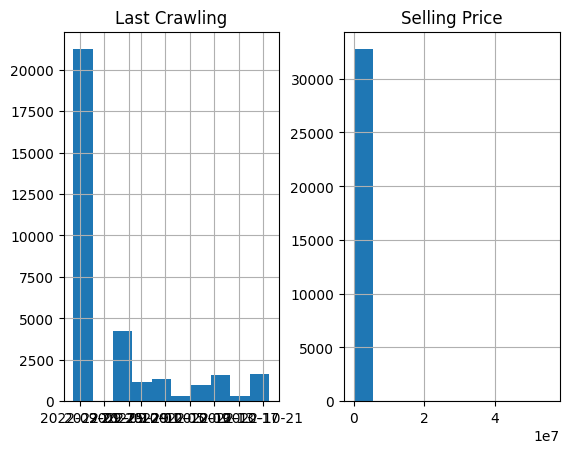

In [18]:
df.hist()
plt.show()

In [19]:
df['Days'] = (df['Last Crawling'] - df['Last Crawling'].min()).dt.days

In [20]:
df['Last Crawling']

0       2022-10-22
1       2022-10-22
2       2022-10-22
3       2022-10-22
4       2022-10-22
           ...    
32767   2022-09-20
32768   2022-09-20
32769   2022-09-20
32770   2022-09-20
32771   2022-09-20
Name: Last Crawling, Length: 32772, dtype: datetime64[ns]

## 3. Modeling

### 3.1 Menentukan Variabel Independent Dependent

In [21]:
X = df['Days'].values
y = df['Selling Price'].values

### 3.1 Split Data

In [22]:
def split_data_train_test(X, y, train_size=0.8, random_state=0):
  np.random.seed(random_state)
  idx = np.random.permutation(len(X))
  split = int(0.8 * len(X))

  X_train = df.drop('Last Crawling', axis=1).iloc[idx[:split]].values
  X_test  = df.drop('Last Crawling', axis=1).iloc[idx[split:]].values
  y_train = df['Last Crawling'].iloc[idx[:split]].values
  y_test  = df['Last Crawling'].iloc[idx[split:]].values

  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = split_data_train_test(X, y)

In [23]:
slope = (len(X) * np.sum(X * y) - np.sum(X) * np.sum(y)) / (len(X) * np.sum(X) - np.sum(X)**2) 
slope

np.float64(1092.591368193308)

In [24]:
intercept = (np.sum(y) - slope * np.sum(X)) / len(X)
intercept

np.float64(261890.4014271731)

In [25]:
y_pred = intercept + slope * X_test
y_pred

array([[6.51664864e+08, 2.61890401e+05],
       [2.40631991e+08, 2.93575551e+05],
       [2.75157879e+08, 2.61890401e+05],
       ...,
       [2.12224616e+08, 2.61890401e+05],
       [1.69613552e+08, 2.61890401e+05],
       [1.83817240e+08, 2.87020003e+05]], shape=(6555, 2))

In [ ]:
#R-squared

RSS = np.sum((y_test - y_pred) ** 2)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)
r2 = 1 - (RSS / TSS)
r2

ValueError: operands could not be broadcast together with shapes (6555,) (6555,2) 

In [ ]:
# MSE 
mse = np.mean((y_test - y_pred) ** 2)

# RMSE
rmse = np.sqrt(mse)

print(mse)
print(rmse)

ValueError: operands could not be broadcast together with shapes (6555,) (6555,2) 

ValueError: x and y must be the same size

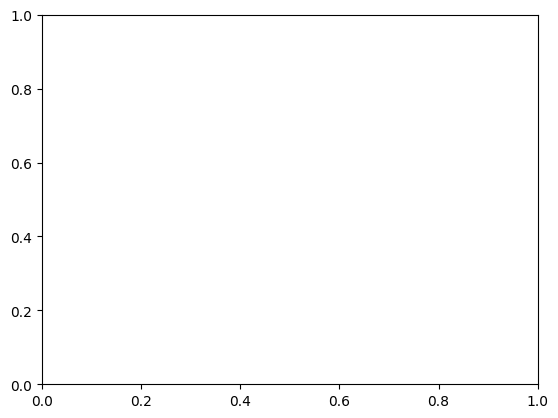

In [ ]:
plt.scatter(y_pred.flatten(), y_test, alpha=0.7)
plt.plot([y_pred.min(), y_pred.max()], [y_test.min(), y_test.max()], '--r', label='Prediksi')
plt.show()